In [18]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [10]:

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

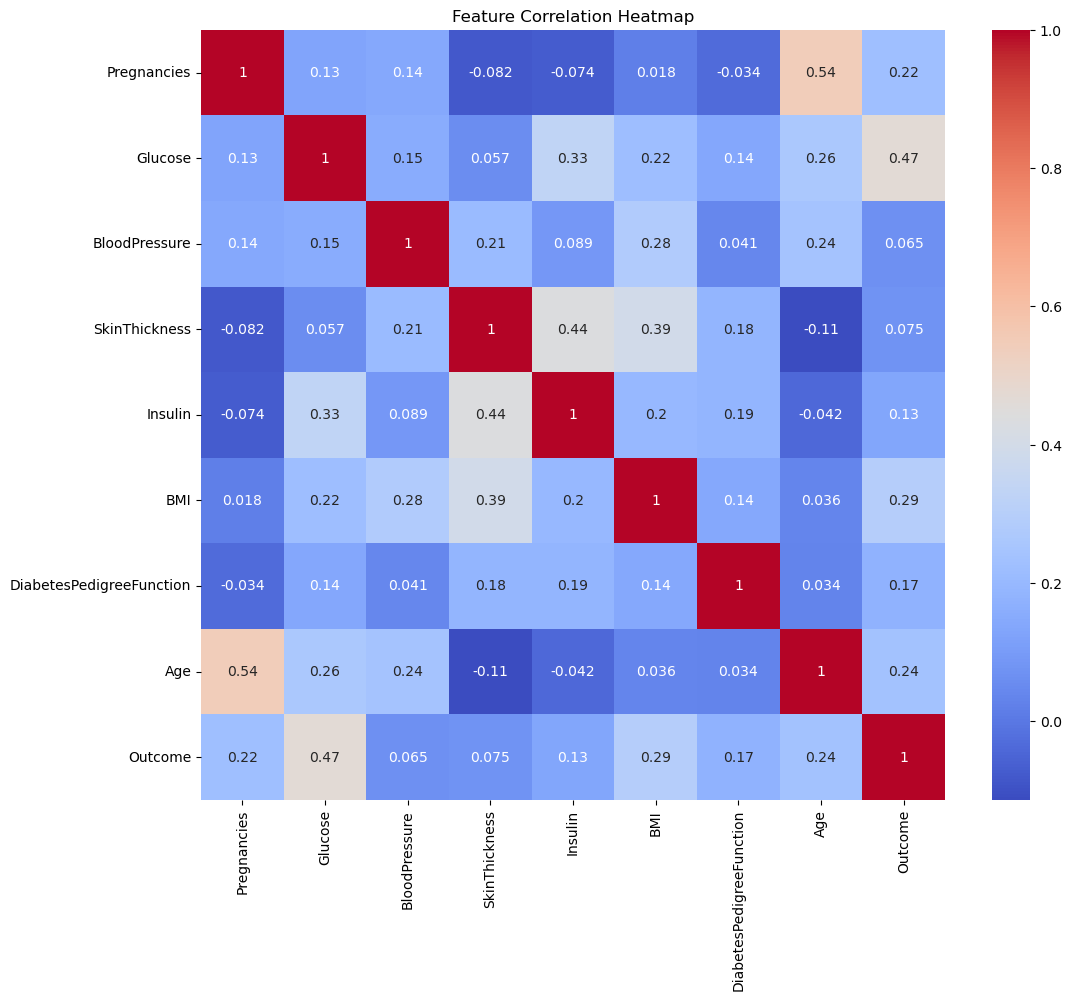

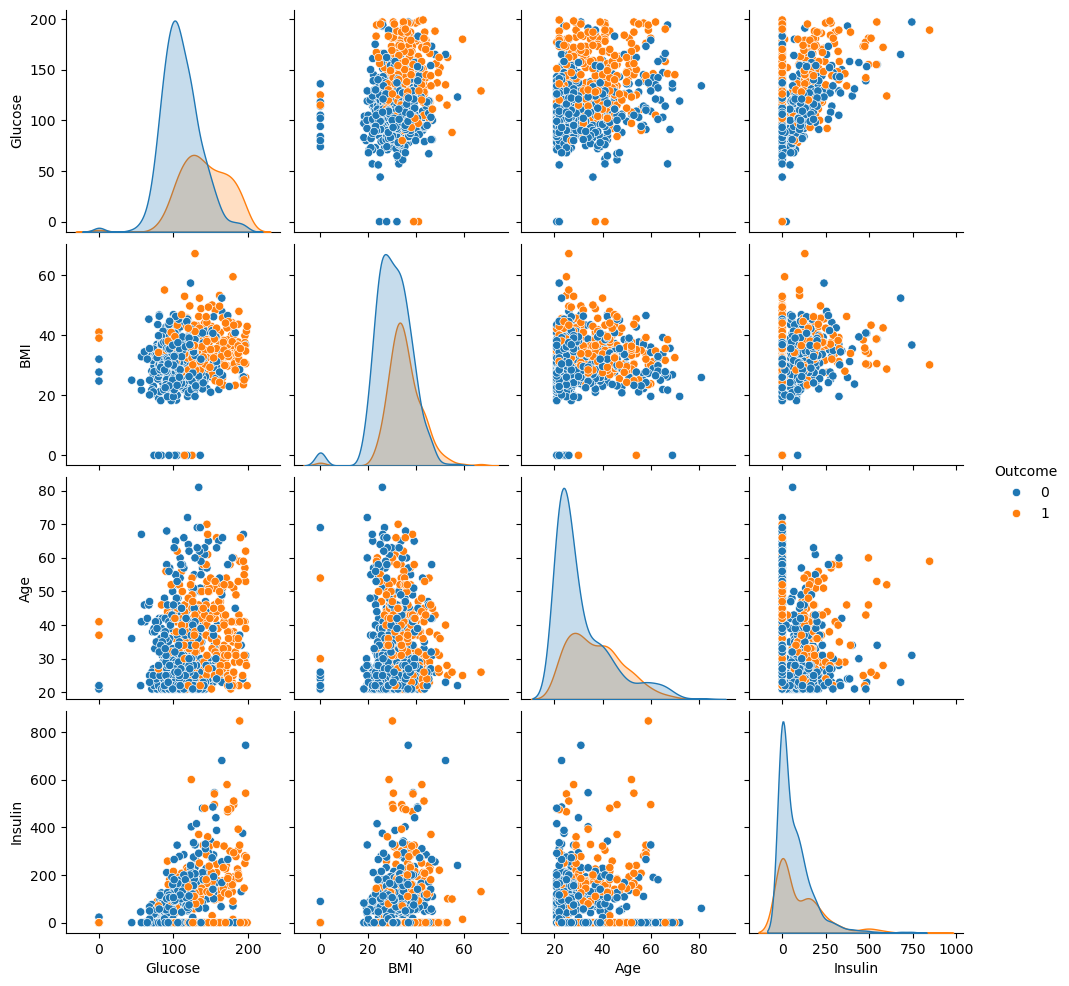

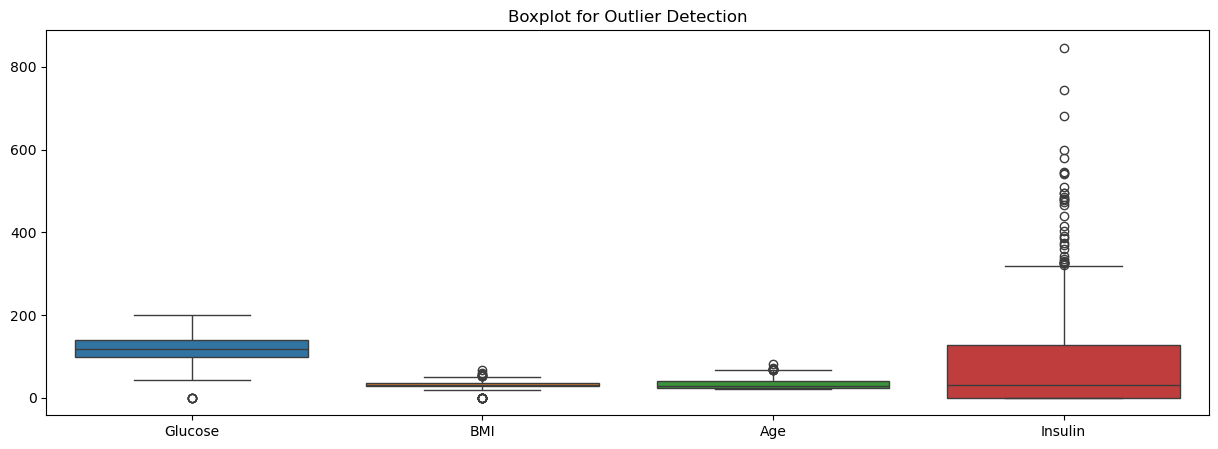

In [2]:
print(data.describe())

plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Pair plots for selected features
selected_features = ['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']
sns.pairplot(data[selected_features], hue='Outcome')
plt.show()

# Boxplot to check for outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=data[['Glucose', 'BMI', 'Age', 'Insulin']])
plt.title('Boxplot for Outlier Detection')
plt.show()

Linear Regression with One Feature (Glucose)


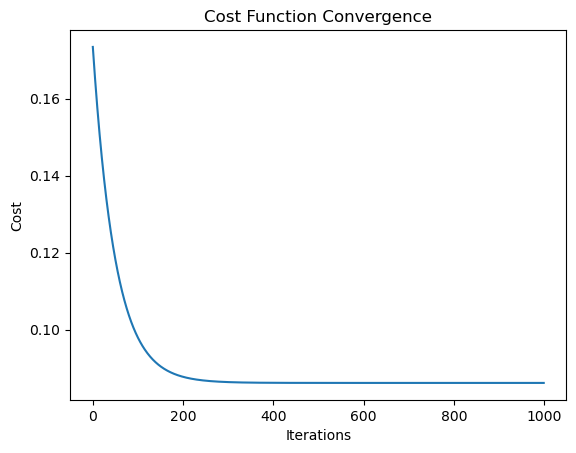

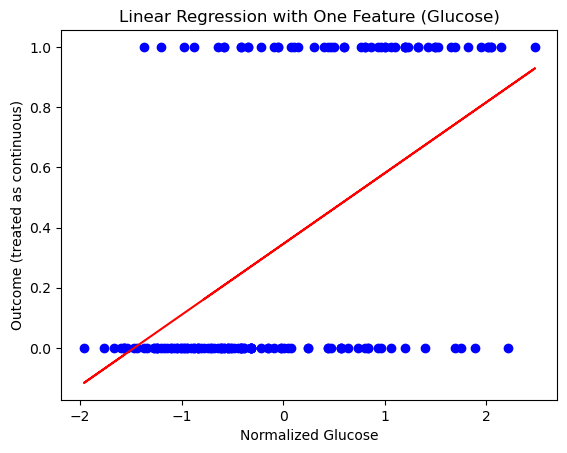

MSE: 0.17051365492373158, R-squared: 0.2573183029988577


In [8]:
# (imputation for glucose)
data['Glucose'].replace(0, np.nan, inplace=True)
data['Glucose'].fillna(data['Glucose'].mean(), inplace=True)

# Normalization
X = data['Glucose'].values.reshape(-1, 1)
y = data['Outcome'].values.reshape(-1, 1)  # Binary outcome (0 or 1 treated as regression)

X = (X - np.mean(X)) / np.std(X)  # Feature scaling

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression using Gradient Descent
def gradient_descent(X, y, alpha=0.01, iterations=1000):
    m = len(y)
    theta = np.zeros((X.shape[1], 1))
    costs = []
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        cost = (1/(2*m)) * np.sum(errors**2)
        costs.append(cost)
        gradient = (1/m) * X.T.dot(errors)
        theta -= alpha * gradient
    
    return theta, costs

c = np.c_[np.ones((X_train.shape[0], 1)), X_train]

theta, costs = gradient_descent(c, y_train)

# Plotting cost function
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.show()

# Predictions
c_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred = c_test.dot(theta)

# Plotting regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Linear Regression with One Feature (Glucose)')
plt.xlabel('Normalized Glucose')
plt.ylabel('Outcome (treated as continuous)')
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, R-squared: {r2}')

 Linear Regression with Multiple Features

In [11]:
X = data.drop('Outcome', axis=1)
y = data['Outcome'].values.reshape(-1, 1)

# Imputation 
X['Glucose'].replace(0, np.nan, inplace=True)
X['BMI'].replace(0, np.nan, inplace=True)
X['Insulin'].replace(0, np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#L2 Regularization
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

#L1 Regularization
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)


mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Ridge - MSE: {mse_ridge}, R-squared: {r2_ridge}')
print(f'Lasso - MSE: {mse_lasso}, R-squared: {r2_lasso}')


Ridge - MSE: 0.1620881518978324, R-squared: 0.29401604951166305
Lasso - MSE: 0.17238855550896812, R-squared: 0.24915206933871648


C:\Users\Dell\AppData\Local\Temp\ipykernel_5056\251049640.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Glucose'].replace(0, np.nan, inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_5056\251049640.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

Polynomial Regression

In [13]:
#Polynomial regression with degree=2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_reg = LinearRegression()
poly_reg.fit(X_train, y_train)
y_pred_poly = poly_reg.predict(X_test)


mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f'Polynomial Regression - MSE: {mse_poly}, R-squared: {r2_poly}')


Polynomial Regression - MSE: 0.17163126548808524, R-squared: 0.2524504880963395


In [14]:
#Polynomial regression with degree=3
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_reg = LinearRegression()
poly_reg.fit(X_train, y_train)
y_pred_poly = poly_reg.predict(X_test)


mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f'Polynomial Regression - MSE: {mse_poly}, R-squared: {r2_poly}')


Polynomial Regression - MSE: 0.8733491221582962, R-squared: -2.8039206209561356


Logistic Regression

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log)
recall = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)
roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}, AUC: {roc_auc}')


Accuracy: 0.7662337662337663, Precision: 0.6727272727272727, Recall: 0.6727272727272727, F1 Score: 0.6727272727272727, AUC: 0.8290174471992653


D:\FAST\anaconda\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Hard SVM

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

try:
    svm_clf = SVC(kernel='linear', C=1e3, probability=True)
    svm_clf.fit(X_train_scaled, y_train)
    y_pred_svm = svm_clf.predict(X_test_scaled)
    y_pred_prob_svm = svm_clf.predict_proba(X_test_scaled)[:, 1]  # Probability for AUC calculation

    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    precision_svm = precision_score(y_test, y_pred_svm)
    recall_svm = recall_score(y_test, y_pred_svm)
    f1_svm = f1_score(y_test, y_pred_svm)
    auc_svm = roc_auc_score(y_test, y_pred_prob_svm)

    print(f'Hard SVM - Accuracy: {accuracy_svm}')
    print(f'Hard SVM - Precision: {precision_svm}')
    print(f'Hard SVM - Recall: {recall_svm}')
    print(f'Hard SVM - F1 Score: {f1_svm}')
    print(f'Hard SVM - AUC: {auc_svm}')

except Exception as e:
    print("Error in Hard SVM implementation")


Hard SVM - Accuracy: 0.7727272727272727
Hard SVM - Precision: 0.6851851851851852
Hard SVM - Recall: 0.6727272727272727
Hard SVM - F1 Score: 0.6788990825688074
Hard SVM - AUC: 0.8308539944903581


Soft SVM with polynomial kernal

In [22]:
from sklearn.model_selection import GridSearchCV

try:
    param_grid_poly = {
        'C': [0.1, 1, 10],
        'degree': [2, 3, 4],
        'gamma': ['scale', 'auto']
    }

    svm_poly = SVC(kernel='poly')
    grid_search_poly = GridSearchCV(svm_poly, param_grid_poly, scoring='accuracy', cv=5)
    grid_search_poly.fit(X_train_scaled, y_train)

    best_poly_svm = grid_search_poly.best_estimator_
    y_pred_svm_poly = best_poly_svm.predict(X_test_scaled)

    # Evaluation
    accuracy_poly = accuracy_score(y_test, y_pred_svm_poly)
    precision_poly = precision_score(y_test, y_pred_svm_poly)
    recall_poly = recall_score(y_test, y_pred_svm_poly)
    f1_poly = f1_score(y_test, y_pred_svm_poly)

    print(f'Soft SVM with Polynomial Kernel - Accuracy: {accuracy_poly}, Precision: {precision_poly}, Recall: {recall_poly}, F1 Score: {f1_poly}')
except Exception as e:
    print(f"Error in Soft SVM with Polynomial Kernel")


Soft SVM with Polynomial Kernel - Accuracy: 0.7727272727272727, Precision: 0.7941176470588235, Recall: 0.4909090909090909, F1 Score: 0.6067415730337079


Soft SVM with RBF Kernel

In [23]:
try:
    param_grid_rbf = {
        'C': [0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1, 'scale']
    }

    svm_rbf = SVC(kernel='rbf')
    grid_search_rbf = GridSearchCV(svm_rbf, param_grid_rbf, scoring='accuracy', cv=5)
    grid_search_rbf.fit(X_train_scaled, y_train)

    best_rbf_svm = grid_search_rbf.best_estimator_
    y_pred_svm_rbf = best_rbf_svm.predict(X_test_scaled)

    # Evaluation
    accuracy_rbf = accuracy_score(y_test, y_pred_svm_rbf)
    precision_rbf = precision_score(y_test, y_pred_svm_rbf)
    recall_rbf = recall_score(y_test, y_pred_svm_rbf)
    f1_rbf = f1_score(y_test, y_pred_svm_rbf)
    roc_auc_rbf = roc_auc_score(y_test, best_rbf_svm.decision_function(X_test_scaled))

    print(f'Soft SVM with RBF Kernel - Accuracy: {accuracy_rbf}, Precision: {precision_rbf}, Recall: {recall_rbf}, F1 Score: {f1_rbf}, AUC: {roc_auc_rbf}')
except Exception as e:
    print(f"Error in Soft SVM with RBF Kernel")

Soft SVM with RBF Kernel - Accuracy: 0.7467532467532467, Precision: 0.6481481481481481, Recall: 0.6363636363636364, F1 Score: 0.6422018348623854, AUC: 0.8145087235996327


TASKS PERFORMANCE

In [ ]:
# Regression Tasks Performance
Linear Regression (One Feature - Glucose):
MSE:0.171
R^2:0.252

Linear Regression with Multiple Features:
Ridge
MSE: 0.162
R^2: 0.294

LASSO
MSE: 0.178
R^2: 0.222

Polynomial Regression:

MSE: 0.1716
R^2: 0.2525

Conclusion:
Ridge Regression with multiple features performed the best for this regression task, as it has the lowest MSE and highest 
𝑅^2.

In [ ]:
#  Classification Tasks Performance
Logistic Regression
Accuracy: 0.7662337662337663, Precision: 0.6727272727272727, Recall: 0.6727272727272727, F1 Score: 0.6727272727272727, AUC: 0.8290174471992653

Hard SVM - Accuracy: 0.7727272727272727
Hard SVM - Precision: 0.6851851851851852
Hard SVM - Recall: 0.6727272727272727
Hard SVM - F1 Score: 0.6788990825688074
Hard SVM - AUC: 0.8308539944903581

Soft Svm polynomial kernel:
Accuracy: 0.7727272727272727, Precision: 0.7941176470588235, Recall: 0.4909090909090909, F1 Score: 0.6067415730337079

Soft Svm RBF kernel:
Accuracy: 0.7467532467532467, Precision: 0.6481481481481481, Recall: 0.6363636363636364, F1 Score: 0.6422018348623854, AUC: 0.8145087235996327

Conclusion:
Hard SVM with a Linear Kernel showed the best balance across all metrics, particularly excelling in precision and achieving a high AUC. It’s a good choice if linear separability is expected or if interpretability is a priority.
Logistic Regression also performed well, particularly with a similar AUC, and is a good choice if interpretability and speed are key factors.
Soft SVM with Polynomial Kernel is ideal when reducing false positives is essential, but the low recall may make it unsuitable for applications needing high sensitivity.
Soft SVM with RBF Kernel offers flexibility for non-linear problems but may require more computational power without strong gains in performance compared to simpler models.
In practice, Hard SVM with a Linear Kernel and Logistic Regression are likely the better choices here, by looking at the data

In [ ]:
. Effect of Regularization
L1 Regularization (Lasso): 
LASSO
MSE: 0.178
R^2: 0.222

L2 Regularization (Ridge): 
Ridge
MSE: 0.162
R^2: 0.294

L1 (Lasso) is beneficial if you seek feature selection, interpretability, and a sparse model, though it may sacrifice some accuracy.
L2 (Ridge) is advantageous for achieving better predictive performance and stability, especially when all features contribute valuable information. Ridge generally results in lower MSE and higher R², as seen here.

In [ ]:
Soft Svm polynomial kernel:
Accuracy: 0.7727272727272727, Precision: 0.7941176470588235, Recall: 0.4909090909090909, F1 Score: 0.6067415730337079

Soft Svm RBF kernel:
Accuracy: 0.7467532467532467, Precision: 0.6481481481481481, Recall: 0.6363636363636364, F1 Score: 0.6422018348623854, AUC: 0.8145087235996327

Conclusion:
RBF Kernel handled the data complexity better, as it achieved more balanced recall and precision and a higher F1 score and AUC, making it better suited for generalization and handling non-linear patterns.
Polynomial Kernel may be overfitting, capturing more complex patterns at the expense of recall, resulting in a model that may not generalize as well. It’s preferable when reducing false positives is a key priority but may miss out on identifying all positive cases.